## MISY408- Project 5 (K-means Clustering)

The Wine data set consists of 13 different parameters of wine such as Alcohol, Malic, Ash, Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, and Proline content which was measured for 176 wine samples. These wines were grown in the same region in Italy but derived from different cultivars. In this project you're going to cluster the wines based on Alcohol and Flavanoids.

**Question 1: Import the required libraries (such as pandas, matplotlib, seaborn) and read the Wine csv file into df dataframe and display first 5 rows of it.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190
2,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
3,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
4,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547


**Question 2: Exploratory data analysis.**

* check the shape of dataset     

In [3]:
df.shape

(176, 13)

* View the statistical summary of numerical variables (describe())

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,176.0,13.002045,0.804145,11.03,12.3675,13.050,13.6725,14.83
Malic_Acid,176.0,2.342216,1.121870,0.74,1.6075,1.865,3.1050,5.80
Ash,176.0,2.360966,0.267880,1.36,2.2100,2.360,2.5525,3.22
Ash_Alcanity,176.0,19.460795,3.280905,10.60,17.2000,19.500,21.5000,30.00
Magnesium,176.0,99.585227,14.275398,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,176.0,2.284375,0.621132,0.98,1.7350,2.335,2.8000,3.88
Flavanoids,176.0,2.001136,0.966694,0.34,1.1750,2.120,2.8075,3.75
Nonflavanoid_Phenols,176.0,0.361477,0.124855,0.13,0.2675,0.340,0.4325,0.66
Proanthocyanins,176.0,1.587784,0.574865,0.41,1.2475,1.545,1.9525,3.58
Color_Intensity,176.0,5.032045,2.313942,1.28,3.2000,4.640,6.2000,13.00


* check for null values 

In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

* drop duplicates
   

In [6]:
df.drop_duplicates(inplace=True)

* Create histplot with 'kernel density estimate' for Alcohol

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

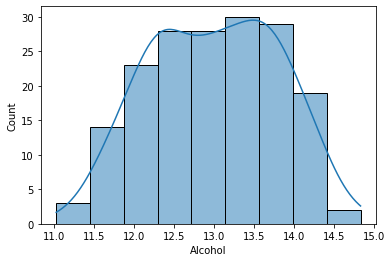

In [7]:
sns.histplot(df['Alcohol'], kde=True)

* Create histplot with 'kernel density estimate' for Flavanoids

<AxesSubplot:xlabel='Flavanoids', ylabel='Count'>

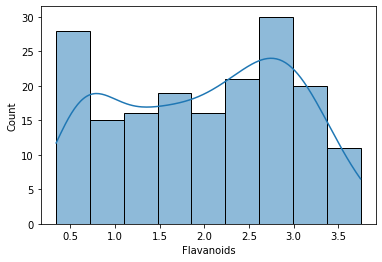

In [8]:
sns.histplot(df['Flavanoids'], kde=True)

**Question 3: Import required Libraries for K-means clustering**

In [9]:
import sklearn
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale, StandardScaler 


**Question 4: Subset the df dataframe to 'Alcohol' and 'Flavanoids' and get a deep copy of df dataframe and save it in df2**

In [10]:
df2 = df[['Alcohol','Flavanoids']].copy()

**Question 5: Scale the data and then print the mean and std of scaled data to make sure the data is scaled**

In [11]:
scaler = StandardScaler()
scaler.fit(df2) 
scaled_array = scaler.transform(df2)

In [12]:
Alcohol_average = np.mean(scaled_array[:,0]) 
Alcohol_std = np.std(scaled_array[:,0])
Flavanoids_average=np.mean(scaled_array[:,1])
Flavanoids_std=np.std(scaled_array[:,1])

print('Alcohol mean is {:.6f}.'.format(Alcohol_average))
print('Alcohol std is {:.6f}.'.format(Alcohol_std))
print('Flavanoids mean is {:.6f}.'.format(Flavanoids_average))
print('Flavanoids std is {:.6f}.'.format(Flavanoids_std))

Alcohol mean is 0.000000.
Alcohol std is 1.000000.
Flavanoids mean is 0.000000.
Flavanoids std is 1.000000.



**Question 6: Identifying the number of optimal clusters**

* Type a code to help you to get the number of optimal clusters

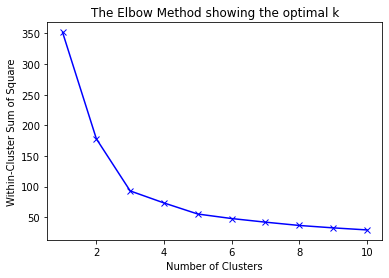

In [13]:
wcss=[] 

from matplotlib import pyplot as plt

for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 0) 
    kmeans.fit(scaled_array)
    wcss.append(kmeans.inertia_) 
    
    
plt.plot(range(1, 11), wcss , 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* How many clusters do we need for clustering the data in this project?

somewhere between 4-5

* Explain the reason for choosing certain number of clusters here:

It's where the elbow changes and levels out. In this case, it's somewhere between 4-5

* Explain why we need to get the number of optimal clusters. Why do not we put each wine in one cluster and create 176 clusters instead?

If each person has their own cluster, the result wouldn't tell us anything. It wouldn't make sense since how can you differentiate what each cluster is doing. It would be very difficult to explain exactly what each cluster would be since all the clusters would be next to each other.

**Question 7: K-means clustering**


* Explain K-means clustering in your own words? What does it do and how does it work?

K-means clustering is a way of grouping similar kinds of items in the form of clusters. It finds the similarities between items and groups them into clusters. We select the value of K using the elbow method. This method works by picking up the range of values and takes the best among them. Once the graph "elbow" is seen, that value(s) can be used as possible options for clusters, k. In the graph above, we see that around 4-5 is when the graph begins to level out and if we select one of the numbers, our output in the scatterplot would show the amount of clusters using different colors for each possible cluster. Also, there is a centroid on each of the clusters and that point is used to look at the different possibilities of data of each cluster.

* Do K-means clustering

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0) # <-- use this number to get my result
kmeans = kmeans.fit(scaled_array) 

* Identify the coordinates of the unscaled centroids, and store the unscaled centroids in a new dataframe called centroids with centroid_Alcohol and centroid_Flavanoids as column names (Display cetroids dataframe in the output)

In [15]:
unscaled_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled_centroids

array([[12.14333333,  2.17888889],
       [13.733     ,  2.9805    ],
       [13.56714286,  0.84892857],
       [12.61058824,  0.93941176]])

In [16]:
centroids = pd.DataFrame({'centroid_Alcohol':unscaled_centroids[:,0],'centroid_Flavanoids':unscaled_centroids[:,1]})

* Explain what centroid is in your own words. Why do we need centroids in K-means clustering? 

The centroid is a point that occurs in the middle of a cluster. It's used to look at the different possibilities of data of each cluster. 

**Question 8: Store the cluster numbers under label column in the df2 dataframe** (display first 5 rows of df2 dataframe to make sure label column is added)

In [17]:
df2['label'] = kmeans.labels_.astype(int) 
df2.head(5) 

,Alcohol,Flavanoids,label
0,12.37,3.75,0
1,13.82,3.74,1
2,14.75,3.69,1
3,13.72,3.67,1
4,14.38,3.64,1


**Question 9: Plot the K-means clustering results with scatterplot (matplotlib)**

* Color should change with label
* Centroids should have red color
* Add x label (Alcohol)
* Add y label (Flavanoids)
* Add title (Clustering with Alcohol and Flavanoids)

_Note: you do not need to create your own palette._

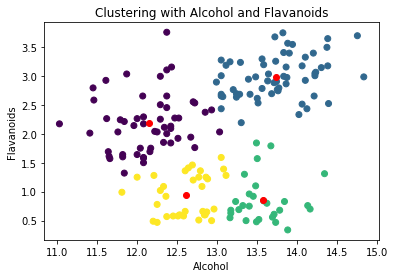

In [18]:
plt.scatter(df2['Alcohol'], df2['Flavanoids'], c=df2['label']) # (x,y,color)
plt.scatter(centroids['centroid_Alcohol'], centroids['centroid_Flavanoids'], c='red') # (x,y,color)
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('Clustering with Alcohol and Flavanoids')

plt.show()

**Question 10: Interpret the results in detail. What does each cluster tell us?**

In the scatter plot above we have found 4 clusters AND 4 centroids represented by the red dot.

The 4 clusters represent: groups of Individuals with different Alcohol and the Flavanoids associated with that.

The Purple Cluster: Mid to High levels of Flavanoids, Low to Mid Alcohol levels.
The Yellow Cluster: Low level of Flavanoids, Low to Mid Alcohol levels.
The Green Cluster: Low levels of Flavanoids, High Alcohol levels.
The Blue Cluster: High levels of Flavanoids, High Alcohol levels.